# SciPy

## scipy.cluster
https://scipy.github.io/devdocs/reference/cluster.html?highlight=cluster#module-scipy.cluster

### .hierarchy
https://scipy.github.io/devdocs/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy  
  
凝集型クラスタリング
* 凝集型クラスタリング（agglomerative clustering）とは、ある原則に基づく一連のクラスタリングアルゴリズムのこと
* 個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
* これを何らかの終了条件を満たすまで繰り返す
* scikit-learnに実装されている終了条件はクラスタの数
* 「最も類似したクラスタ」を決定する連結（linkege）度にはさまざまなものがあり、この連結度は常に2つのクラスタ間に定義される
* ward: デフォルト。併合した際にクラスタ内の分散の増分が最小になるように2つのクラスタを選択する。多くの場合比較的同じサイズのクラスタになる。
* average: average連結度を用いると、クラスタ間のすべてのポイント間の距離の平均値が最小の2クラスタを併合する。
* complete: complete連結度は2つクラスタの点間の距離の最大値が最小となるものを併合する。
* 凝集型クラスタリングで生成される階層的なクラスタ割当
* この可視化の方法によって階層化の詳細を理解できるが、データが2次元であることに依存する
* 多次元のデータセットの階層型クラスタリングの可視化を行いたい場合は、デンドログラム（dendrogram）と呼ばれる方法を用いると良い
* デンドログラムはscikit-learnではサポートされていないが、Scipyを使えば簡単にできる


### .ward
scipy.cluster.hierarchy.ward(y)  
https://scipy.github.io/devdocs/reference/generated/scipy.cluster.hierarchy.ward.html#scipy.cluster.hierarchy.ward  
  
戻り値：
* 最初と2番目の要素は、各ステップでマージされた2つのクラスターであり、3番目の要素はこれらのクラスター間の距離であり、4番目の要素は新しいクラスターのサイズ（含まれる元のデータポイントの数）


In [91]:
# scipyからデンドログラム関数とwardクラスタリング関数をインポート
from scipy.cluster.hierarchy import ward
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X,_=cancer.data,cancer.target

# wardクラスタリングをデータ配列Xに適用
# scipyのward関数は、凝集型クラスタリングを行った際のブリッジ距離を示す配列を返す
linkage_array=ward(X)
display(X.shape)
display(linkage_array.shape)
display(linkage_array[0])

(569, 30)

(568, 4)

array([287.        , 336.        ,   3.81596727,   2.        ])

#### .dendrogram
scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')  
https://scipy.github.io/devdocs/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram  
  
* デンドログラムは、データポイントを一番下の点として表す
* 次に、これらのポイントを葉とし、2つのクラスタが結合されたものを新しいノードとして木構造をプロットする
* デンドログラムの枝の長さは、それぞれのクラスタがどれだけ離れていたかを表す

Text(0, 0.5, 'Cluster distance')

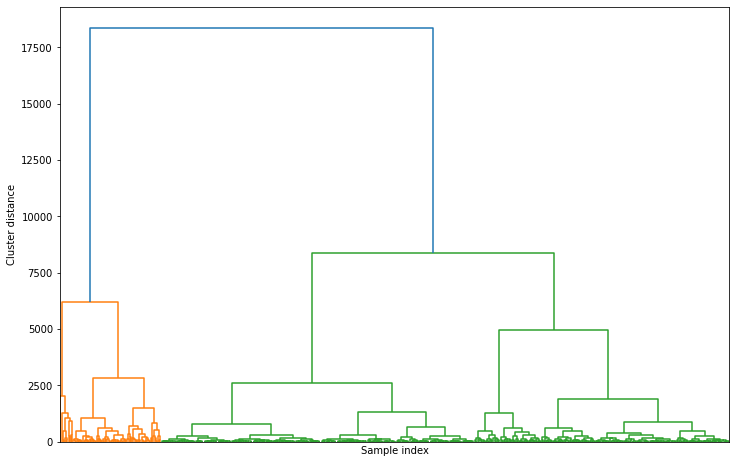

In [105]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムとしてプロットする
dn=dendrogram(linkage_array,no_labels=True)

plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

#### .fcluster
scipy.cluster.hierarchy.fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)  
https://scipy.github.io/devdocs/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster  
  
Z: ndarray
* linkage関数によって返される行列でエンコードされた階層的クラスタリング。
  
t: スカラー
* 基準「一貫性のない」、「距離」または「モノクリット」の場合、これは、フラットクラスターを形成するときに適用するしきい値です。
* 'maxclust'または 'maxclust_monocrit'基準の場合、これは、要求されたクラスターの最大数になります。

In [106]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score
from icecream import ic

# デンドログラムを見ると、t（しきい値）=10000で2つのクラスタに分けられることがわかる
clusters=fcluster(linkage_array,t=10000,criterion='distance')    
display(clusters)    # cluster 1 or 2に分けられている

ic(adjusted_rand_score(cancer.target,clusters))

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

ic| adjusted_rand_score(cancer.target,clusters): 0.2872456066095377


0.2872456066095377